# Table of Contents

- import libraries and set up environment
- create subsets of data to work with
- correlation matrix heatmap
- scatterplot
- pairplot
- categorical plot
- key questions review

## 1. Set up Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# setting master path
path = r'/Users/Norberto/Desktop/2024 World University Rankings Analysis'
# setting pandas options
pd.set_option('display.max_columns',None)
# checking matplotlib version
matplotlib.__version__
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## 2. Create Data Subsets

In [2]:
# read dataset from pickle file
thewur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'rankings_merged.csv'))

# create subset with only quantitative variables
wur_q = thewur[['rank_order','scores_teaching','scores_intl_outlk',
                'scores_industry_incme','scores_research',
                'scores_citations','stats_number_students',
                'stats_student_staff_ratio','stats_pc_intl_students',
                'stats_female_pct','stats_male_pct','year','gdp%']]

wur_q.describe()

rank_order  scores_teaching  scores_intl_outlk  \
count  14235.000000     14235.000000       14235.000000   
mean     666.618054        30.058349          48.330235   
std      476.461303        15.151232          22.892412   
min        1.000000         8.200000           0.000000   
25%      251.000000        19.300000          29.000000   
50%      591.000000        25.500000          44.400000   
75%     1014.000000        36.100000          64.650000   
max     1906.000000        99.700000         100.000000   

       scores_industry_incme  scores_research  scores_citations  \
count           14235.000000     14235.000000      14235.000000   
mean               46.190783        26.040077         51.217724   
std                19.792330        18.773767         27.186978   
min                 0.000000         0.800000          0.700000   
25%                35.100000        12.300000         27.200000   
50%                39.500000        19.800000         51.200000   
75%                52.700000        33.500000         74.300000   
max               100.000000       100.000000        100.000000   

       stats_number_students  stats_student_staff_ratio  \
count           1.243200e+04               12432.000000   
mean            2.336508e+04                  18.897708   
std             3.498470e+04                  17.056597   
min             2.500000e+01                   0.300000   
25%             1.014775e+04                  12.300000   
50%             1.782150e+04                  16.300000   
75%             2.921550e+04                  22.000000   
max             1.824383e+06                 865.800000   

       stats_pc_intl_students  stats_female_pct  stats_male_pct          year  \
count            12432.000000      11841.000000    11841.000000  14235.000000   
mean                11.303652         50.117051       49.882949   2019.722023   
std                 11.823633         12.354613       12.354613      3.425403   
min                  0.000000          0.000000        0.000000   2011.000000   
25%                  2.000000         44.000000       42.000000   2017.000000   
50%                  7.000000         53.000000       47.000000   2020.000000   
75%                 17.000000         58.000000       56.000000   2023.000000   
max                 92.000000        100.000000      100.000000   2024.000000   

              gdp%  
count  7979.000000  
mean      4.786060  
std       1.087987  
min       1.199786  
25%       4.056020  
50%       4.928890  
75%       5.435440  
max      11.524796

The code above creates a df with only the quantitative variables from the 

In [3]:
# create subset of df with only 2024 rankings
wur_24 = wur_q[wur_q['year']==2024]
wur_24q = wur_24[['rank_order','gdp%',
                     'scores_teaching','scores_intl_outlk',
                     'scores_industry_incme','scores_research',
                     'scores_citations','stats_number_students',
                      'stats_student_staff_ratio','stats_pc_intl_students',
                      'stats_female_pct','stats_male_pct']]

sub24_stats = wur_24q[['stats_number_students',
                        'stats_student_staff_ratio',
                        'stats_pc_intl_students',
                        'stats_female_pct','gdp%']]

sub24_scores = wur_24q[['scores_teaching','scores_intl_outlk',
                        'scores_industry_incme','scores_research',
                        'scores_citations']]

wur_24q.describe()

rank_order  gdp%  scores_teaching  scores_intl_outlk  \
count  1906.000000   0.0      1906.000000        1906.000000   
mean    953.500000   NaN        29.050997          49.931007   
std     550.359125   NaN        13.961323          21.838594   
min       1.000000   NaN         9.400000          16.100000   
25%     477.250000   NaN        19.400000          32.000000   
50%     953.500000   NaN        25.800000          45.350000   
75%    1429.750000   NaN        34.500000          65.400000   
max    1906.000000   NaN        99.000000          98.800000   

       scores_industry_incme  scores_research  scores_citations  \
count            1906.000000      1906.000000        1906.00000   
mean               47.051312        23.411857          52.20745   
std                26.147341        16.693090          25.06582   
min                15.600000         4.600000           3.40000   
25%                22.225000        11.800000          30.42500   
50%                41.050000        17.250000          52.45000   
75%                68.175000        29.875000          73.27500   
max               100.000000       100.000000          99.70000   

       stats_number_students  stats_student_staff_ratio  \
count            1906.000000                1906.000000   
mean            22181.050892                  18.670567   
std             25327.508290                  11.067821   
min                25.000000                   0.300000   
25%              9413.000000                  12.325000   
50%             16546.000000                  16.300000   
75%             28580.250000                  22.075000   
max            482541.000000                 199.900000   

       stats_pc_intl_students  stats_female_pct  stats_male_pct  
count             1906.000000       1829.000000     1829.000000  
mean                10.332634         51.155823       48.844177  
std                 11.880223         12.509047       12.509047  
min                  0.000000          0.000000        0.000000  
25%                  2.000000         44.000000       41.000000  
50%                  6.000000         53.000000       47.000000  
75%                 15.000000         59.000000       56.000000  
max                 92.000000        100.000000      100.000000

In [4]:
# create subset of df with only top 200 universities from all years
top200 = wur_q[wur_q['rank_order']<201]
top200q = top200[['rank_order','gdp%','year',
                     'scores_teaching','scores_intl_outlk',
                     'scores_industry_incme','scores_research',
                     'scores_citations','stats_number_students',
                      'stats_student_staff_ratio','stats_pc_intl_students',
                      'stats_female_pct','stats_male_pct']]

top200q_stats = top200q[['stats_number_students',
                        'stats_student_staff_ratio',
                        'stats_pc_intl_students',
                        'stats_female_pct','gdp%']]

top200q_scores = top200q[['scores_teaching','scores_intl_outlk',
                        'scores_industry_incme','scores_research',
                        'scores_citations']]

top200q.describe()

rank_order         gdp%         year  scores_teaching  \
count  2801.000000  2107.000000  2801.000000      2801.000000   
mean    100.425562     5.319771  2017.499107        52.452196   
std      57.713018     0.899738     4.031406        16.604344   
min       1.000000     2.388629  2011.000000        15.900000   
25%      50.000000     4.928890  2014.000000        40.200000   
50%     100.000000     5.262050  2017.000000        48.800000   
75%     150.000000     5.608450  2021.000000        61.900000   
max     200.000000     8.494430  2024.000000        99.700000   

       scores_intl_outlk  scores_industry_incme  scores_research  \
count        2801.000000            2801.000000      2801.000000   
mean           66.570368              56.944698        55.360336   
std            20.962881              25.762559        18.831284   
min             0.000000               0.000000        13.100000   
25%            51.700000              39.100000        41.300000   
50%            67.100000              51.000000        51.400000   
75%            85.100000              77.600000        67.500000   
max           100.000000             100.000000       100.000000   

       scores_citations  stats_number_students  stats_student_staff_ratio  \
count       2801.000000            1800.000000                1800.000000   
mean          81.778686           26078.080000                  18.171333   
std           14.170212           13828.866925                  12.292319   
min            8.600000             462.000000                   3.000000   
25%           73.900000           15769.000000                  11.075000   
50%           85.000000           24597.000000                  14.700000   
75%           92.700000           34255.250000                  20.200000   
max          100.000000           83236.000000                  85.800000   

       stats_pc_intl_students  stats_female_pct  stats_male_pct  
count             1800.000000       1627.000000     1627.000000  
mean                22.657778         50.657037       49.342963  
std                 11.919948          9.222167        9.222167  
min                  1.000000          0.000000       30.000000  
25%                 13.750000         48.000000       44.000000  
50%                 20.000000         53.000000       47.000000  
75%                 29.000000         56.000000       52.000000  
max                 73.000000         70.000000      100.000000

In [5]:
wur_q.corr().round(decimals=3)

rank_order  scores_teaching  scores_intl_outlk  \
rank_order                      1.000           -0.645             -0.542   
scores_teaching                -0.645            1.000              0.331   
scores_intl_outlk              -0.542            0.331              1.000   
scores_industry_incme          -0.340            0.383              0.197   
scores_research                -0.702            0.904              0.464   
scores_citations               -0.793            0.533              0.544   
stats_number_students          -0.003           -0.016             -0.047   
stats_student_staff_ratio      -0.006           -0.113              0.007   
stats_pc_intl_students         -0.495            0.400              0.811   
stats_female_pct               -0.067           -0.036              0.208   
stats_male_pct                  0.067            0.036             -0.208   
year                            0.507           -0.235             -0.047   
gdp%                           -0.434            0.219              0.375   

                           scores_industry_incme  scores_research  \
rank_order                                -0.340           -0.702   
scores_teaching                            0.383            0.904   
scores_intl_outlk                          0.197            0.464   
scores_industry_incme                      1.000            0.460   
scores_research                            0.460            1.000   
scores_citations                           0.210            0.596   
stats_number_students                     -0.003            0.014   
stats_student_staff_ratio                  0.022           -0.001   
stats_pc_intl_students                     0.216            0.481   
stats_female_pct                          -0.210           -0.024   
stats_male_pct                             0.210            0.024   
year                                       0.044           -0.243   
gdp%                                      -0.058            0.289   

                           scores_citations  stats_number_students  \
rank_order                           -0.793                 -0.003   
scores_teaching                       0.533                 -0.016   
scores_intl_outlk                     0.544                 -0.047   
scores_industry_incme                 0.210                 -0.003   
scores_research                       0.596                  0.014   
scores_citations                      1.000                 -0.016   
stats_number_students                -0.016                  1.000   
stats_student_staff_ratio             0.001                  0.691   
stats_pc_intl_students                0.424                 -0.094   
stats_female_pct                      0.148                  0.063   
stats_male_pct                       -0.148                 -0.063   
year                                 -0.132                 -0.027   
gdp%                                  0.380                 -0.009   

                           stats_student_staff_ratio  stats_pc_intl_students  \
rank_order                                    -0.006                  -0.495   
scores_teaching                               -0.113                   0.400   
scores_intl_outlk                              0.007                   0.811   
scores_industry_incme                          0.022                   0.216   
scores_research                               -0.001                   0.481   
scores_citations                               0.001                   0.424   
stats_number_students                          0.691                  -0.094   
stats_student_staff_ratio                      1.000                  -0.034   
stats_pc_intl_students                        -0.034                   1.000   
stats_female_pct                               0.038                   0.094   
stats_male_pct                                -0.038                  -0.094   
year                                    

## 3. Correlation Matrix Heatmap

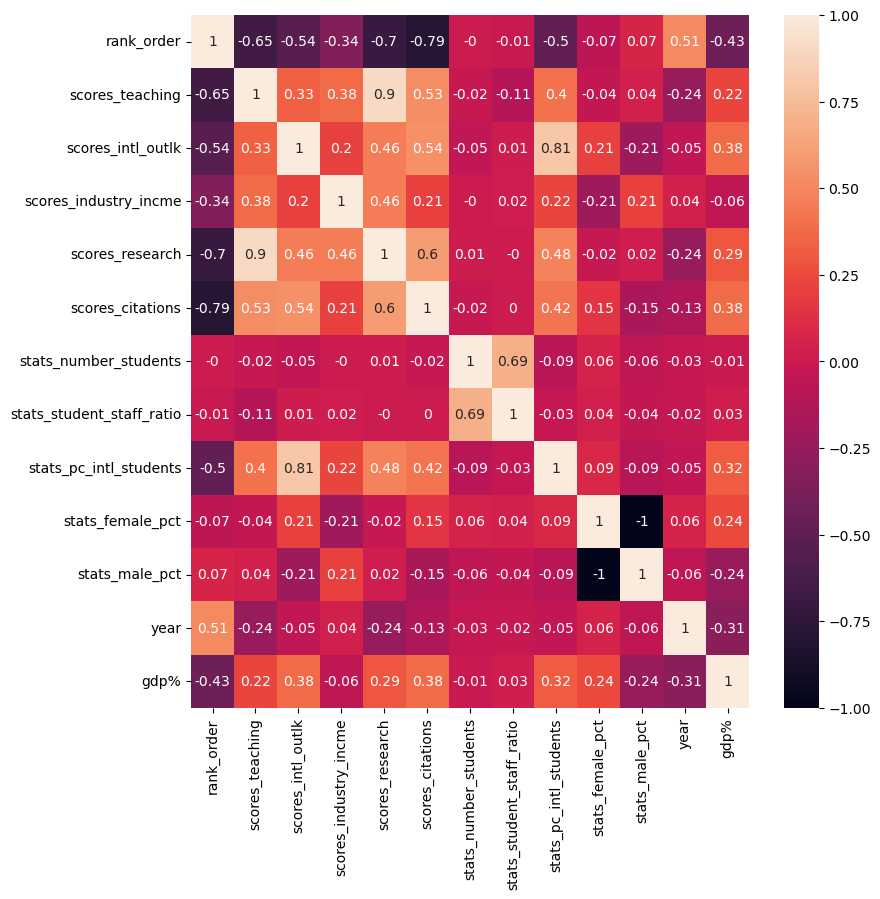

In [6]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(wur_q.corr().round(decimals=2), annot = True, ax = ax) 

In [7]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','corr_heatmap.png'))

The correlation matrix heatmap above gives us an explanation of all the quantitative variables in the dataset. When the dataset is broken down into the scores and stats, it becomes easier to understand what the expected behavior of each variable would be. `'rank_order'` is the ultimate variable in this data set since it indicates the performance of each school.

For instance, within the `'scores'` variables, a negative correlation with `'rank_order'` is a good thing because the higher the score, the lower value `'rank_order'` has. This lets us understand the factors that affected `'rank_order'` the most. Research and citations scores have a negative correlation with `'rank_order'` at -0.7 and -0.79 which make them the most significant factors in determining those scores. This makes sense because THEWUR favors research institutions, as explained in their methodology.

The `'stats'` variables are less correlated with `'rank_order'` with most of them showing almost none between the variables. However, when `'stats_pc_intl_students'` increase, their is a moderate relationship to rankings. This means that schools with higher percentage of international students sometimes rank better, although that is not always the case.

Correlations of note are: 
- `'scores_teaching'` and `'scores_research'`. With a score of .9, the positive correlation between these two variables is very strong. Schools that received a high teaching score also have received a high research score.
- `'stats_pc_intl_students'` and `'scores_intl_outlk'`. With a score of .81, the positive correlation between these two variables is also strong. Schools with higher percentage of international students tend to score higher in their international outlook.
- The opposite coefficients for `'stats_female_pct'` and `'stats_male_pct'` is expected because they are explicitly dependent on one another.


## 4. Scatterplot

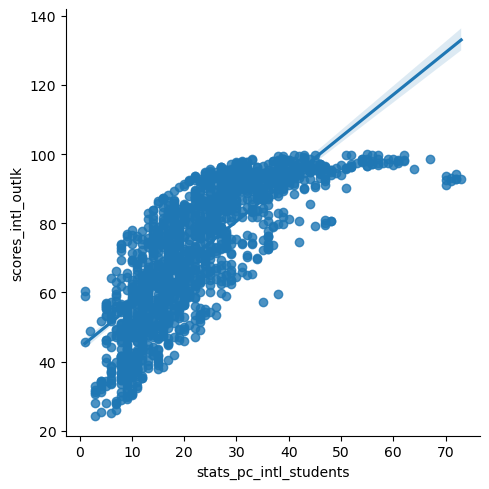

In [8]:
scatter = sns.lmplot(x = 'stats_pc_intl_students', y = 'scores_intl_outlk', data = top200q)

In [9]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter-intl_stu_pct-vs-intl_outlk.png'))

The steep line in this linear-regression model visually demonstrates the strong relation between the percentage of international students and the score in international outlook for each university. The line shows that an international student percentage of 0%-15% has a different relationship than 15%-30%. After 30%, the trend flattens out, due to scores being capped at 100. Certain outliers with high percentage of international students(i.e.: 30%-40%) but relatively low scores(i.e.: 60) also exist in the dataset. 

Since `'scores_intl_outlk'` has a weak correlation with `'rank_order'`, I do NOT expect this relationship to be present between percentage of international students and rankings.

## 5. Pairplot

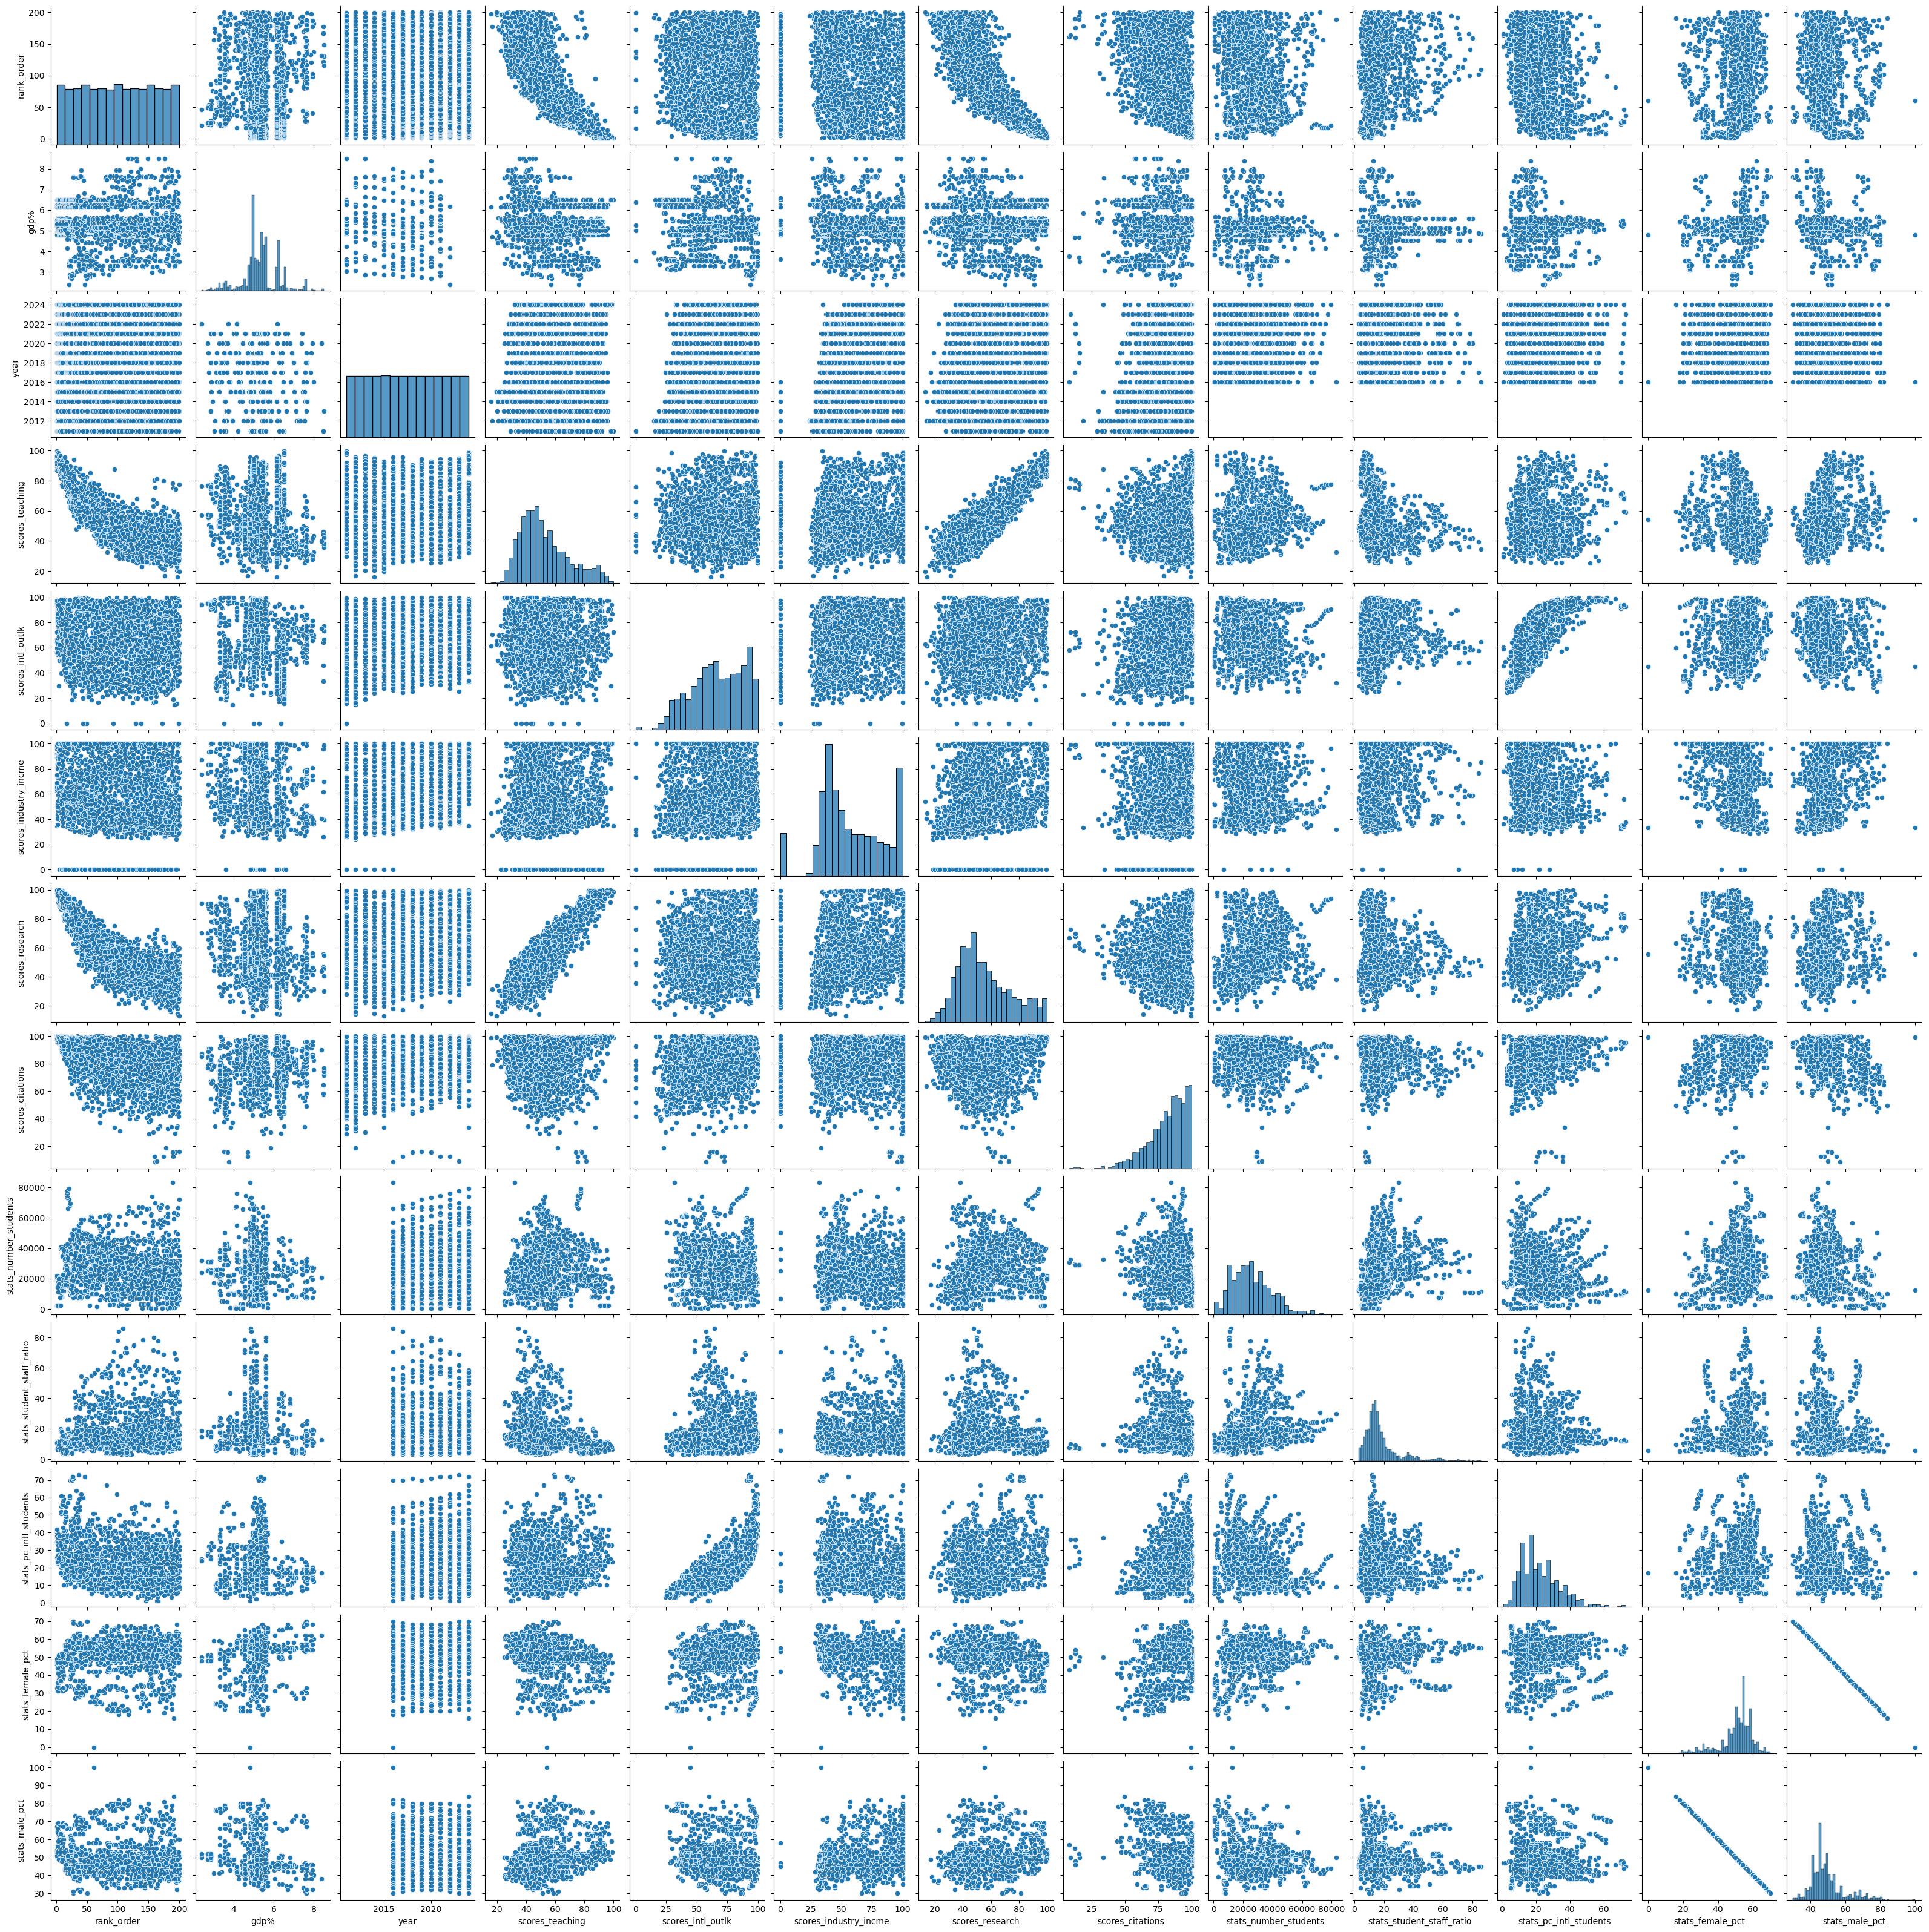

In [10]:
# create pairplot from the top 200 schools 
pairplot = sns.pairplot(top200q,dropna=True)

In [11]:
pairplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pairplot.png'))

This pairplot is fairly large due to the number of quantitative variables in this dataset. To assist with the processing time/power, as well as to get more detailed information, a subset of the data with the top 200 universities from each year was used as opposed to the entire dataset with 14235 rows; this subset contains 2801 rows instead. With 13 independent variables, the size of this pairplot is 13x13, which means 169 charts were created to represent this df. Most of the variables show little to no correlation with each other. The few relationships of note are:
- `'rank_order'` x `'scores_teaching'`
- `'rank_order'` x `'scores_research'`
- `'scores_intl_outlk'` x `'stats_pc_intl_students'`
- `'scores_research'` x `'scores_teaching'`
- `'stats_student_staff_ratio'` x `'scores_teaching'`
- `'stats_number_students'` x `'scores_teaching'`

Since the variable `'year'` is limited to whole numbers between 2011 and 2024, the distribution stands out in the dataset and behaves as expected with all values falling within those lines. Also, missing `'stats'` from 2011 to 2016 is shown on this pairplot with those years not containing any plotted datapoints.

The gender percentages forming a perfectly diagonal line is expected because the values are dependent on one another and always equal the same value.


## 6. Categorical Plots

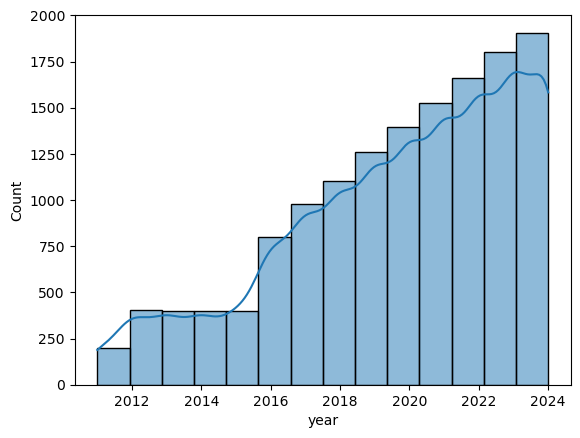

In [12]:
cat_plot1 = sns.histplot(wur_q['year'], bins = 14, kde = True)

In [13]:
cat_plot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','catplot-year.png'))

This catplot of the `'year'` variable shows that more recent years had as many as 10 times more entries than previous years. Most of the data comes from recent years. With a minimum of around 200, creating the subset of the top 200 universities from each year helps equalize the data without creating too much bias across the years.

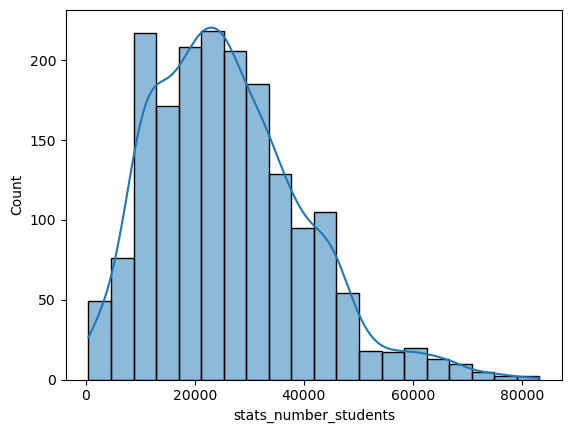

In [14]:
cat_plot2 = sns.histplot(top200q[top200q['stats_number_students']<100000]['stats_number_students'], bins = 20, kde = True)

In [15]:
cat_plot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','catplot-num_students.png'))

This `'stats_number_students'` variable allows us to determine school sizes. In order to make categorizing clearer, the results filtered out schools with more than 100,000 students. Across the entire dataset, there are 149 entries with more than 100,000 students, with a minimum rank of 239. These schools will not affect the top 200 universities sub-dataframe, and will can be put into their own category designating them as outliers. The groupings would be:
- Below 20k students; small-size school
- Between 20k and 40k students; medium-size school
- Between 40k and 100k students; large-size school
- Above 100k students; very large-size school

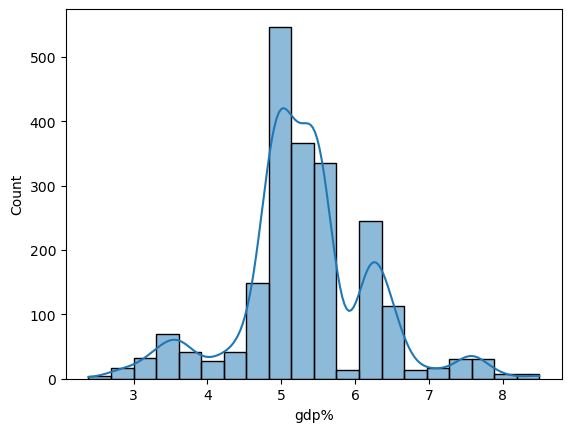

In [16]:
cat_plot3 = sns.histplot(top200q['gdp%'], bins = 20, kde = True)

In [17]:
cat_plot3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','catplot-gdp%.png'))

This distribution of the `'gdp%'` shows that the top 200 universities most frequently are located in countries that spend between 5% and 6% of GDP on education. Since the value in this column is dependent on the `'location'` of the university, this variable can also show, in a way, which countries are most prominent in the top 200. 3 categories can be created from this chart:
- Below 4.8%; lower education budget
- Between 4.8% and 6%; common education budget
- Above 6%: higher education budget

## 7. Key Questions

#### New Questions

- How does school size contribute to performance?
- How does GDP% spent on education contribute to performance?

#### Answers

- Q: Does gender distribution contribute to academic achievement?
- A: Gender distribution does show a slight pattern with `'rank_order'`. The best ranking universities(closer to 0) tend to have less than 50% women. When the pct of female students increases beyond that 50%, a trend begins where those universities do not rank as well. Also, the top 200 universities tend to have a higher percentage of female students than male students.

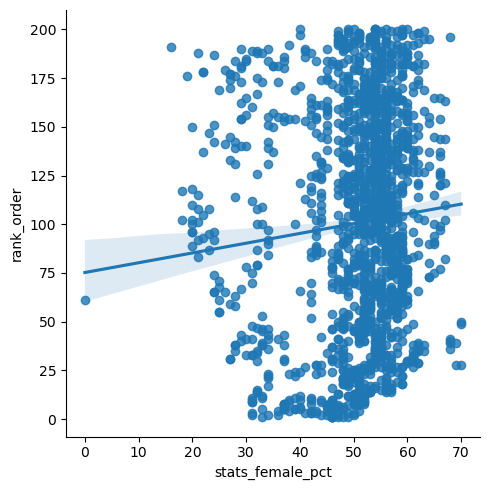

In [18]:
scatter2 = sns.lmplot(x = 'stats_female_pct', y = 'rank_order', data = top200)

In [19]:
scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter-female_pct-vs-rank_order.png'))

- Q: How does GDP% spent on education contribute to performance?
- A: Countries that spent about 5% of GDP on education have the most schools in the top 200 ranked schools every year. Schools located in countries that spend more than 6% on GDP are less likely to have a better ranking, which means that spending too much on education can also negatively impact performance. The correlation is not strong at all, which means that other factors that are associated with higher government spending could affect university performance.

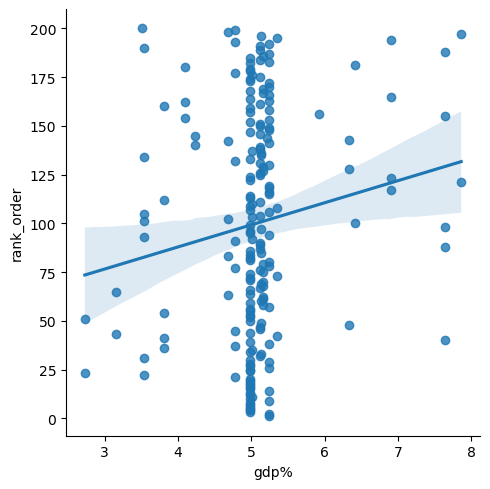

In [27]:
scatter3 = sns.lmplot(x = 'gdp%', y = 'rank_order', data = top200[top200['year']==2019])

In [28]:
scatter3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter-gdp%-vs-rank_order_2019.png'))

## 8. Hypothesis